In [1]:
%load_ext autoreload
%autoreload 2

In [56]:
import sys
import subprocess
import os
import pandas as np
import numpy as np
import pathlib
import re
import glob
import pandas as pd

module_path = "/Users/jmccarty/Data/221205_ipv_workbench/github/IPV_Workbench"
sys.path.insert(0, module_path)
from workbench.utilities import general, config_utils, temporal, io
from workbench.manage import manage
from workbench.host import host, results_writers
from workbench.workflows import workflows

In [3]:
par_dir = "/Users/jmccarty/Desktop/test_project"
project_name = 'test1'
base_epw = "/Users/jmccarty/Desktop/CHE_ZH_Zurich.AP.066700_TMYx.2007-2021.epw"
device_id = 'D0013'

config_file = manage.initiate_project(par_dir, project_name, base_epw, device_id)
my_proj = manage.Project(config_file)
my_proj.project_setup()

Destination file already exists, copy aborted./n/Users/jmccarty/Desktop/test_project/test1/inputs/shared/tmy/base.epw
Destination file already exists, copy aborted./n/Users/jmccarty/Desktop/test_project/test1/inputs/hosts/B1000/base/geometry/0_workbench_geometry_template.3dm
Destination file already exists, copy aborted./n/Users/jmccarty/Desktop/test_project/test1/inputs/hosts/B1000/base/geometry/0_workbench_geometry_template.gh
The project is initialized. We have created a base host object named 'B1000'.
You will need to either move or create the geometry and panelizer files into the appropriate directories.
The geometry files should follow the convention defined in the output of the template grasshopper and rhino files.
The panelizer files are those that have been created using the grasshopper utility. The Panelizer is
not ready for a pure python implementation as of yet.


In [45]:
my_host = host.Host(my_proj)

In [12]:
surface = my_host.get_surfaces()[0]

surface_details = my_host.get_dict_instance([surface])['Details']

pd.read_csv(my_host.project.module_cell_data, index_col='device_id').loc[surface_details['device_id']].to_dict()


{'device_name': 'mini-monocrystalline',
 'cell': 'monocrystalline',
 'orientation': 'portrait',
 'cec_database_key': 'Sharp_NU_U235F2',
 'Wp': 25,
 'gamma_ref': -0.00485,
 'cell_width': 150.0,
 'cell_height': 150.0,
 'cell_col_spacing': 2.5,
 'cell_row_spacing': 2.5,
 'n_cols_ideal': 2,
 'n_rows_ideal': 3,
 'n_cols': 2,
 'n_rows': 3,
 'n_submodule': 1,
 'frame_size': 15,
 'module_width': 332.5,
 'module_height': 485.0,
 'N_s_ideal': 6,
 'N_p_ideal': 1,
 'N_s': 6,
 'N_p': 1,
 'total_cells': 6,
 'Nsubcell_col': 1,
 'Nsubcell_row': 1,
 'cell_area': 0.135,
 'Wp_m2_cell': 185.1851852,
 'module_area': 0.1612625,
 'Wp_m2_module': 155.0267421,
 'cell_effective_area': 0.837144407,
 'min_cell_module': 6.0,
 'breakdown_factor': 0.002,
 'breakdown_exp': 3.28,
 'breakdown_voltage': -5.5,
 'diode_threshold': -0.5,
 'minimum_irradiance_cell': 5}

In [48]:
my_host.solve_module_cell_pts(surface)

In [101]:
for srf in my_host.get_surfaces():
    power = my_host.sum_simple_module_results(srf, 'center_point')['pmp']
    srf_c = general.clean_grasshopper_key(srf)
    # n_sensors  = len(pd.read_feather(f"/Users/jmccarty/Desktop/test_project/test1/outputs/B1000/base/irradiance/surface_{srf_c}/diffuse.feather").columns)
    print(srf,n_sensors," : ", power.sum())

{1000;1} 44  :  303218.7279551194
{1000;8} 44  :  207330.0216122253
{1000;3} 44  :  278228.27475609793
{1000;11} 44  :  70249.25617941783
{1000;13} 44  :  1323212.3323369785
{1000;2} 44  :  254663.69008473132


KeyboardInterrupt: 

In [88]:
srf = my_host.get_surfaces()[2]
my_host.get_dict_instance([srf,my_host.get_modules(srf)[0]])['Yield']

{'central_inverter': {'eff': {},
  'vmp': {},
  'area': {},
  'pmp': {},
  'irrad': {},
  'imp': {}},
 'cell_point': {'area': {}, 'pmp': {}, 'irrad': {}},
 'initial_simulation': {'eff': {},
  'vmp': {},
  'area': {},
  'pmp': {},
  'irrad': {},
  'imp': {}},
 'string_inverter': {'eff': {},
  'vmp': {},
  'area': {},
  'pmp': {},
  'irrad': {},
  'imp': {}},
 'micro_inverter': {'eff': {},
  'vmp': {},
  'area': {},
  'pmp': {},
  'irrad': {},
  'imp': {}},
 'center_point': {'area': {}, 'pmp': {}, 'irrad': {}}}

In [110]:
workflows.run_module_point(my_host, 'center_point')

Starting module center point analysis workflow for surface 1000_1.
Completed in 1.08 seconds.
-----------------------
Starting module center point analysis workflow for surface 1000_8.
Completed in 0.94 seconds.
-----------------------
Starting module center point analysis workflow for surface 1000_3.
Completed in 1.23 seconds.
-----------------------
Starting module center point analysis workflow for surface 1000_11.
Completed in 0.59 seconds.
-----------------------
Starting module center point analysis workflow for surface 1000_13.
Completed in 9.92 seconds.
-----------------------
Starting module center point analysis workflow for surface 1000_2.
Completed in 0.93 seconds.
-----------------------
Starting module center point analysis workflow for surface 1000_7.
Completed in 0.99 seconds.
-----------------------
Starting module center point analysis workflow for surface 1000_4.
Completed in 1.24 seconds.
-----------------------
Starting module center point analysis workflow for sur

IndexError: invalid index to scalar variable.

In [109]:
df = my_host.sum_simple_module_results('{1000;8}', 'center_point')

<AxesSubplot:>

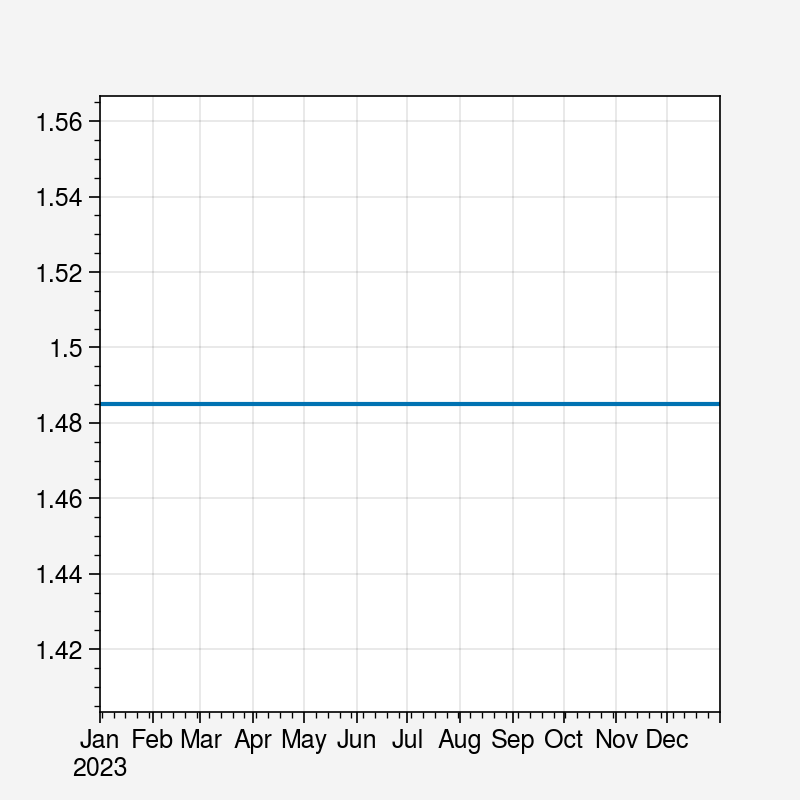

In [108]:
df['area'].plot()